***
# **<p style="text-align: center;">LAB 1: Computational Statistics</p>**
### <p style="text-align: center;">- Emilio PICARD -</p>

***

## **Setup**

In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt


# **Exercise 1**

In [68]:
# Question 2
from _utils_ import get_samples

# Question 3
n = 10 # number of candidates
x_cand = np.array([i for i in range(n)]) # values of the candidates
prob_samples = np.random.rand(n)
probs = prob_samples / np.sum(prob_samples)

N = 1000 # number of samples
samples = get_samples(x_cand, prob=probs, N=N)

#### **Theoritical vs Empirical distribution**

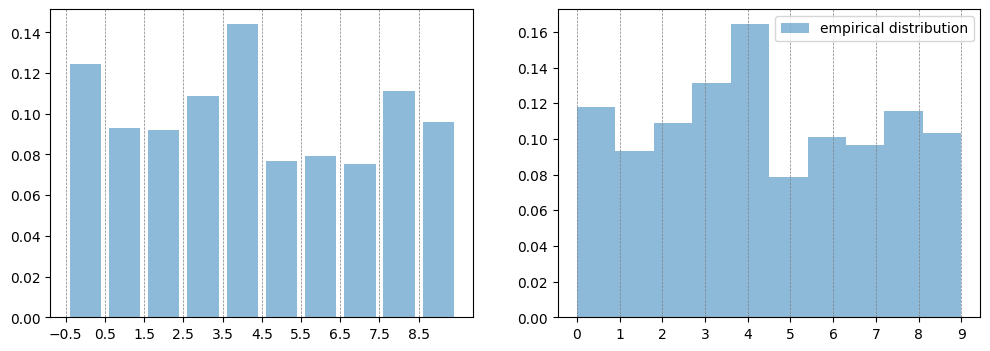

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(x_cand, probs, alpha=0.5, label='theoritical distribution')
ax[0].set_xticks(ticks=x_cand-1/2)
ax[0].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax[1].hist(samples, bins=n, density=True, alpha=0.5, label='empirical distribution')
ax[1].set_xticks(ticks=x_cand)
ax[1].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()


# **Exercise 2**

### Samples of the gaussian mixture model

In [134]:
# samples of a Gaussian mixture law
from _utils_ import get_gmm_samples

N = 100
m = 3
alpha = np.array([0.3, 0.5, 0.2])
# for X in R:
mus = np.array([[-1, -1], [1, 1], [2, 2]])
sigmas = np.array([np.eye(2), 3/2*np.eye(2), 1/2*np.eye(2)])

gmm_samples = get_gmm_samples(m, alpha, mus, sigmas, N)

### If the samples are of dim 1, we can observe the theorical distribution

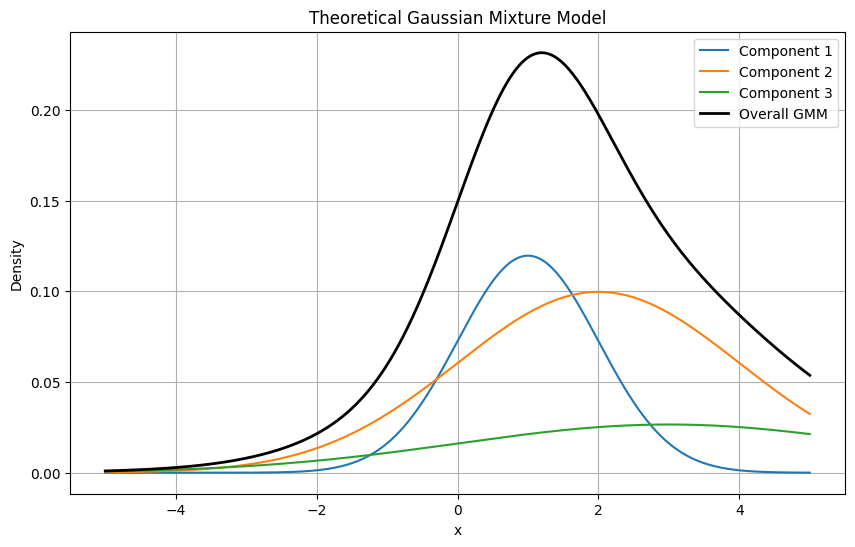

In [140]:
from scipy.stats import norm

# assert
assert type(gmm_samples[0]) == float, 'not a good dim for this plot'

# plot
x = np.linspace(-5, 5, 1000)
gmm_pdf = np.zeros_like(x)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each gaussian
for i in range(m):
    pdf = alpha[i] * norm.pdf(x, mus[i], sigmas[i])
    gmm_pdf += pdf
    ax.plot(x, pdf, label=f'Component {i+1}')

# Plot the overall GMM
ax.plot(x, gmm_pdf, label='Overall GMM', linewidth=2, color='black')

ax.set_title('Theoretical Gaussian Mixture Model')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.legend()
plt.grid()
plt.show()

### **EM Algorithm**

In [ ]:
N = 100
m = 3

alphas_true = [0.3, 0.5, 0.2]
mus_true = [np.array([0, 0]), np.array([5, 5]), np.array([-5, -5])]
sigmas_true = [np.eye(2), np.eye(2), np.eye(2)]

X = get_gmm_samples(m, alphas_true, mus_true, sigmas_true, N)

In [144]:
from _utils_ import em_gmm

hat_alphas, hat_mus, hat_sigmas, log_likelihoods = em_gmm(X, m)

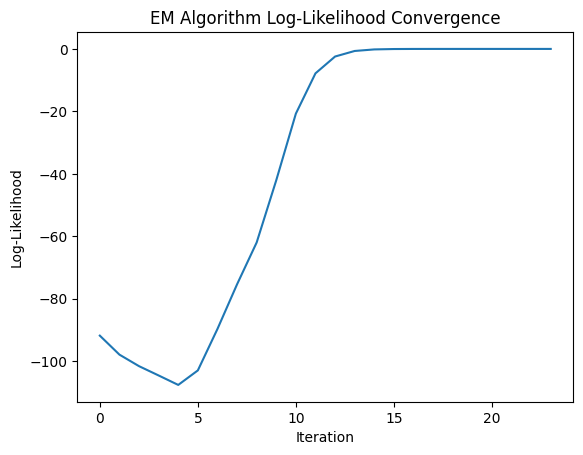

In [145]:
plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('EM Algorithm Log-Likelihood Convergence')
plt.show()